#**Lipinski's rule of five**

Lipinski’s Rule of Five evaluates druglikeness and predicts oral drug activity.
For an orally active drug:

No more than 5 hydrogen bond donors.

No more than 10 hydrogen bond acceptors (nitrogen or oxygen atoms).

Molecular mass less than 500 daltons.

Calculated octanol-water partition coefficient (Clog P) not exceeding 5.

#*Installing* *Packages*

In [ ]:
!pip install rdkit
!pip install pubchempy

#*Importing Packages*

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import MolSurf
from rdkit import Chem

#Creating data frame and importing *structure*

In [ ]:
as1 = ['CN(C)C(=N)NC(N)=N']
df = pd.DataFrame(as1)

In [ ]:
df["mol"] = df[0].apply(Chem.MolFromSmiles)

Structure:- 	


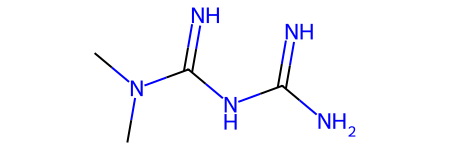

In [ ]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
mol = Chem.MolFromSmiles(as1[0])

print('Structure:- \t')
mol

In [ ]:
import pubchempy as pcp
comp = pcp.get_compounds(as1[0], 'smiles')[0]
name = comp.iupac_name
print('The IUPAC Name for the compound is:- \t', name)
#df["IUPAC Name"] = df["name"]

The IUPAC Name for the compound is:- 	 3-(diaminomethylidene)-1,1-dimethylguanidine


In [ ]:
df["MW"] = df["mol"].apply(Descriptors.MolWt) # molecular weight
df["LogP"] = df["mol"].apply(Descriptors.MolLogP) # octanol-water partition coefficient
df["TPSA"] = df["mol"].apply(Descriptors.TPSA) # topological polar surface area
df["HBA"] = df["mol"].apply(Descriptors.NumHAcceptors) # number of hydrogen bond acceptors
df["HBD"] = df["mol"].apply(Descriptors.NumHDonors) # number of hydrogen bond donors


In [ ]:
df

,0,mol,MW,LogP,TPSA,HBA,HBD
0,CN(C)C(=N)NC(N)=N,<rdkit.Chem.rdchem.Mol object at 0x793fe1b11fc0>,129.167,-1.03416,88.99,2,4
